<a href="https://colab.research.google.com/github/OMEAkin/ML_with_TF_Opencampus_SH/blob/main/Wk2_Nbk1_Cats_and_Dogs_OMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## !! PROGRESS !!

> TO-DO: Undersample Code



---



# Image Preprocessing and Binary Classification with Keras

## Objective
In this week's exercise, you will:
1. Learn how to image preprocessing in keras.
2. Build and train a multilayer neural network for binary classification on a real-world dataset of cats and dogs.

---

## Step 1: Import Libraries
Let's start by importing the necessary libraries.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


---

## Step 2: Load and Preprocess the Data
We will use the Keras `ImageDataGenerator` for image augmentation and preprocessing.
First, unzip the uploaded dataset.


In [ ]:
!wget --no-check-certificate https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

--2023-11-16 11:38:11--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.115.207, 172.253.122.207, 172.253.63.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.115.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M   190MB/s    in 0.3s    

2023-11-16 11:38:12 (190 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [ ]:
!unzip -q cats_and_dogs_filtered.zip

## Step 3: Learn about undersampling and implement it
Research online what undersampling and random undersampling is. It is a very powerful technique used often in machine Learning. Find out when it is used and undersample your dataset using "random undersampling"

In [ ]:
# undersample your dataset here
# create a dataset using the recommended methods
# train_data = tf.keras.utils.image_dataset_from_directory(
#    directory = '/content/cats_and_dogs_filtered/train',
#    label_mode='binary',
#    batch_size=32,
#    image_size=(256,256),

#    seed=123)

# val_data = tf.keras.utils.image_dataset_from_directory(
#     directory = '/content/cats_and_dogs_filtered/validation',
#     label_mode='binary',
#     batch_size=32,
#     image_size=(256, 256),
#     seed=123)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


---

## Step 4: Set Up ImageDataGenerator (or well more specifically the new version)
Were Sorry - the videos from the coursera course are sometimes not the most up to date. In this case the 'ImageDataGenerator' function is deprecated (look here https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator) and will be removed in the future versions. The concept behind the new reccomended function is very similar though.
The new reccomendation is loading images with tf.keras.utils.image_dataset_from_directory and transforming the output tf.data.Dataset with preprocessing layers.

You may use Chat GPT for this task and you can also check the following tutorials <br>
https://www.tensorflow.org/tutorials/load_data/images <br>
https://www.tensorflow.org/tutorials/load_data/images <br>
https://www.tensorflow.org/guide/keras/preprocessing_layers <br>

In [ ]:
#load data + define data directories
import os

traindata_dir = os.path.join('/content/cats_and_dogs_filtered/train')
train_cat_dir = os.path.join('/content/cats_and_dogs_filtered/train/cats')
train_dog_dir = os.path.join('/content/cats_and_dogs_filtered/train/dogs')

In [ ]:
#to check out filenames in the training directories
train_cat_names = os.listdir(train_cat_dir)
print(train_cat_names[:10])

train_dog_names = os.listdir(train_dog_dir)
print(train_dog_names[:10])

['cat.422.jpg', 'cat.226.jpg', 'cat.162.jpg', 'cat.660.jpg', 'cat.332.jpg', 'cat.854.jpg', 'cat.35.jpg', 'cat.616.jpg', 'cat.932.jpg', 'cat.711.jpg']
['dog.685.jpg', 'dog.223.jpg', 'dog.723.jpg', 'dog.553.jpg', 'dog.749.jpg', 'dog.427.jpg', 'dog.149.jpg', 'dog.896.jpg', 'dog.926.jpg', 'dog.63.jpg']


In [ ]:
#find total number of cat and dogs in each directory
print('total training cat images:', len(os.listdir(train_cat_dir)))
print('total training dog images:', len(os.listdir(train_dog_dir)))

total training cat images: 1000
total training dog images: 1000


In [ ]:
#using matplotlib to check the images

#shows the plot below, after this code
%matplotlib inline

import matplotlib as mpimg #'image' submodule of matplotlib library
from PIL import Image

#parameters for  matplotlib
nrows = 4
ncols = 4

#index for iterating over images (COME BACK TO THIS!)
pic_index = 0

###### mpimg: good for operations like loading, rescaling, image display





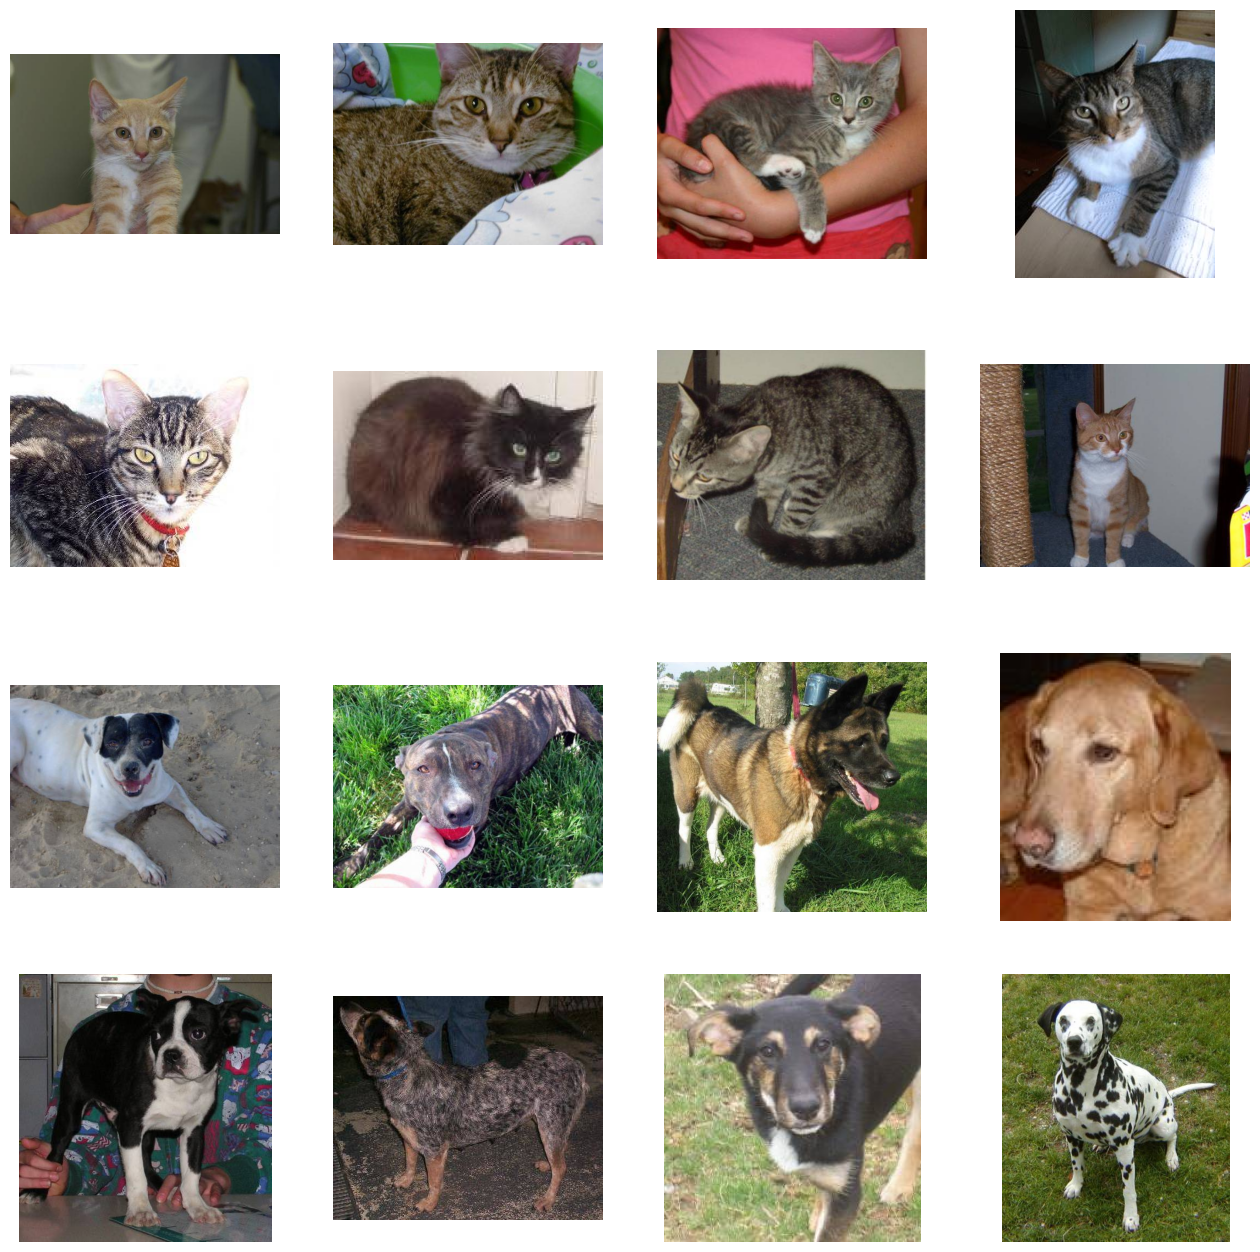

In [ ]:
#matplotlib fig set-up + fit in 4x4 pics
fig = plt.gcf ()
fig.set_size_inches(ncols*4, nrows*4)

pic_index += 8
nxt_cat_pic = [os.path.join(train_cat_dir, fname)
                for fname in train_cat_names[pic_index-8:pic_index]]
nxt_dog_pic = [os.path.join(train_dog_dir, fname)
                for fname in train_dog_names[pic_index-8:pic_index]]

for i, img_path in enumerate(nxt_cat_pic+nxt_dog_pic):
  #create subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off')

  imgs = Image.open(img_path)
  plt.imshow(imgs)

plt.show()

In [ ]:
# create a dataset using the recommended methods
train_data = tf.keras.utils.image_dataset_from_directory(
    directory = '/content/cats_and_dogs_filtered/train',
    label_mode='binary',
    batch_size=32,
    image_size=(256,256),
    seed=123
)


val_data = tf.keras.utils.image_dataset_from_directory(
    directory = '/content/cats_and_dogs_filtered/validation',
    label_mode='binary',
    batch_size=32,
    image_size=(256, 256),
    seed=123
)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [ ]:
from tensorflow.python.framework.ops import profiler_trace
#normalize
def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label

train_data = train_data.map(process)
val_data = val_data.map(process)

##### Notes: batch size in power of 2s are rule of thumb (e.g. 32, 64, 128)
- large batch size results in faster training time but more GPU memory
- small batch size: introduce more randomness into weight and can be good for escaping local minima + can help the model generalize to unseen data (weight based on smaller subset of data), better for data with more noise/variation
- larger batch size: more accurate gradient estimate & faster convergence which can cause overfitting, training is stabilized but can potentially get stuck in a local minimum, good for clean/well-structured data

---

## Step 5: Build a Multilayer Neural Network
Now, let's build a multilayer neural network for binary classification.


In [ ]:
# build a model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(256, 256, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    #second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    #third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    #fourth convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    #flatten results
    tf.keras.layers.Flatten(),
    #128 hidden layer
    tf.keras.layers.Dense(128, activation='relu'),
    #1 output layer. Will be 0 or 1.
    tf.keras.layers.Dense(1, activation='sigmoid')
 ])

from tensorflow.keras.optimizers import RMSprop

# compile the model
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_84 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_84 (MaxPooli  (None, 127, 127, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_85 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_85 (MaxPooli  (None, 62, 62, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_86 (Conv2D)          (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_86 (MaxPooli  (None, 30, 30, 64)      

---

## Step 6: Train the Model
Train the model using the Dataset you created


In [ ]:
# define callback
class AccuracyCallback(tf.keras.callbacks.Callback):
      def on_epoch_end(self, epoch, logs={}):
        if (logs.get('accuracy')> 0.90):
          print("\nReached 90% accuracy so training is cancelled")
          self.model.stop_training = True

accuracy_callback = AccuracyCallback()

In [ ]:
train_hist = model.fit(train_data, epochs = 10, validation_data=val_data, callbacks=[accuracy_callback])

Epoch 1/10
63/63 [==============================] - 265s 4s/step - loss: 0.7022 - accuracy: 0.5120 - val_loss: 0.6903 - val_accuracy: 0.5000
Epoch 2/10
63/63 [==============================] - 262s 4s/step - loss: 0.6875 - accuracy: 0.5710 - val_loss: 0.6713 - val_accuracy: 0.6270
Epoch 3/10
63/63 [==============================] - 254s 4s/step - loss: 0.6611 - accuracy: 0.5885 - val_loss: 0.6308 - val_accuracy: 0.6420
Epoch 4/10
63/63 [==============================] - 258s 4s/step - loss: 0.6173 - accuracy: 0.6540 - val_loss: 0.6502 - val_accuracy: 0.6540
Epoch 5/10
63/63 [==============================] - 260s 4s/step - loss: 0.5933 - accuracy: 0.6810 - val_loss: 0.7200 - val_accuracy: 0.5750
Epoch 6/10
63/63 [==============================] - 256s 4s/step - loss: 0.5491 - accuracy: 0.7160 - val_loss: 0.5888 - val_accuracy: 0.7050
Epoch 7/10
63/63 [==============================] - 259s 4s/step - loss: 0.5086 - accuracy: 0.7430 - val_loss: 0.6481 - val_accuracy: 0.6760
Epoch 8/10
63

---

## Step 7: Evaluate the Model
After training, you may upload some test images to evaluate your model.


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
from google.colab import files

def load_and_predict(model):
    uploaded_files = files.upload()

    for fn in uploaded_files.keys():
        path = '/content/' + fn
        img = image.load_img(path, target_size=(256, 256))

        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0) / 255.0

        classes = model.predict(x)
        result = "a dog" if classes[0] > 0.5 else "a cat"

        print(f'The model predicts that the image is of {result}')

# Call the function to upload images and get predictions
load_and_predict(model)

Saving img-cat-whiskers-101-header.jpg to img-cat-whiskers-101-header (2).jpg
1/1 [==============================] - 0s 152ms/step
The model predicts that the image is of a cat
